# Proyek Akhir: Menyelesaikan Permasalahan Perusahaan Edutech

- Nama: Hanna Febriani Sutarman
- Email:hannafebriani675@gmail.com
- Id Dicoding: hannafebriani

## Persiapan

In [163]:
!pip install gdown
!pip install imbalanced-learn

### Menyiapkan library yang dibutuhkan

In [164]:
import gdown
import pandas as pd
from sklearn.metrics import classification_report, accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import train_test_split
from google.colab import files
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectFromModel
import seaborn as sns
import matplotlib.pyplot as plt
import joblib

### Menyiapkan data yang akan diguankan

In [165]:
file_id = '15-3xDnVMR0USg-MnR14iAsLIjniwMXVU'
gdown.download(f'https://drive.google.com/uc?id={file_id}', quiet=False)


Downloading...
From: https://drive.google.com/uc?id=15-3xDnVMR0USg-MnR14iAsLIjniwMXVU
To: /content/data.csv
100%|██████████| 529k/529k [00:00<00:00, 92.0MB/s]


'data.csv'

## Data Understanding
Memahami data yang akan digunakan

In [166]:
df = pd.read_csv('data.csv', sep=';')
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 37 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Marital_status                                4424 non-null   int64  
 1   Application_mode                              4424 non-null   int64  
 2   Application_order                             4424 non-null   int64  
 3   Course                                        4424 non-null   int64  
 4   Daytime_evening_attendance                    4424 non-null   int64  
 5   Previous_qualification                        4424 non-null   int64  
 6   Previous_qualification_grade                  4424 non-null   float64
 7   Nacionality                                   4424 non-null   int64  
 8   Mothers_qualification                         4424 non-null   int64  
 9   Fathers_qualification                         4424 non-null   i

,Marital_status,Application_mode,Application_order,Course,Daytime_evening_attendance,Previous_qualification,Previous_qualification_grade,Nacionality,Mothers_qualification,Fathers_qualification,...,Curricular_units_2nd_sem_credited,Curricular_units_2nd_sem_enrolled,Curricular_units_2nd_sem_evaluations,Curricular_units_2nd_sem_approved,Curricular_units_2nd_sem_grade,Curricular_units_2nd_sem_without_evaluations,Unemployment_rate,Inflation_rate,GDP,Status
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


**Insights:**

Data terdiri dari 4424 baris dan 37 kolom

## EDA
Melakukan eksplorasi data untuk melihat insight pada data

1. Mengecek deskripsi fitur numerik

In [167]:
df.describe()

,Marital_status,Application_mode,Application_order,Course,Daytime_evening_attendance,Previous_qualification,Previous_qualification_grade,Nacionality,Mothers_qualification,Fathers_qualification,...,Curricular_units_1st_sem_without_evaluations,Curricular_units_2nd_sem_credited,Curricular_units_2nd_sem_enrolled,Curricular_units_2nd_sem_evaluations,Curricular_units_2nd_sem_approved,Curricular_units_2nd_sem_grade,Curricular_units_2nd_sem_without_evaluations,Unemployment_rate,Inflation_rate,GDP
count,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,...,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000
mean,1.178571,18.669078,1.727848,8856.642631,0.890823,4.577758,132.613314,1.873192,19.561935,22.275316,...,0.137658,0.541817,6.232143,8.063291,4.435805,10.230206,0.150316,11.566139,1.228029,0.001969
std,0.605747,17.484682,1.313793,2063.566416,0.311897,10.216592,13.188332,6.914514,15.603186,15.343108,...,0.690880,1.918546,2.195951,3.947951,3.014764,5.210808,0.753774,2.663850,1.382711,2.269935
min,1.000000,1.000000,0.000000,33.000000,0.000000,1.000000,95.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.600000,-0.800000,-4.060000
25%,1.000000,1.000000,1.000000,9085.000000,1.000000,1.000000,125.000000,1.000000,2.000000,3.000000,...,0.000000,0.000000,5.000000,6.000000,2.000000,10.750000,0.000000,9.400000,0.300000,-1.700000
50%,1.000000,17.000000,1.000000,9238.000000,1.000000,1.000000,133.100000,1.000000,19.000000,19.000000,...,0.000000,0.000000,6.000000,8.000000,5.000000,12.200000,0.000000,11.100000,1.400000,0.320000
75%,1.000000,39.000000,2.000000,9556.000000,1.000000,1.000000,140.000000,1.000000,37.000000,37.000000,...,0.000000,0.000000,7.000000,10.000000,6.000000,13.333333,0.000000,13.900000,2.600000,1.790000
max,6.000000,57.000000,9.000000,9991.000000,1.000000,43.000000,190.000000,109.000000,44.000000,44.000000,...,12.000000,19.000000,23.000000,33.000000,20.000000,18.571429,12.000000,16.200000,3.700000,3.510000


2. Distribusi status mahasiswa

<Axes: title={'center': 'Distribusi Status Mahasiswa'}, xlabel='Status'>

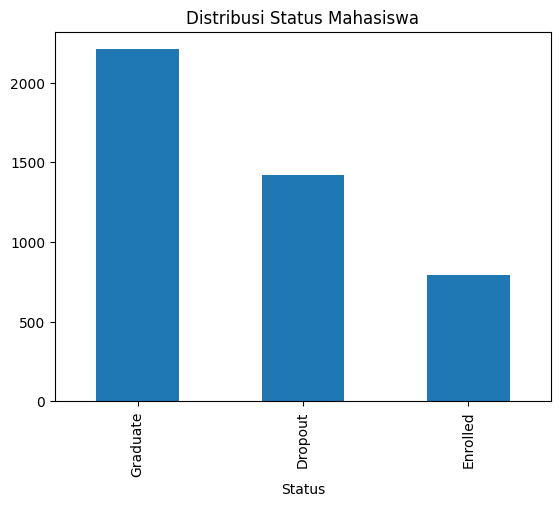

In [168]:
df['Status'].value_counts()
df['Status'].value_counts(normalize=True)
df['Status'].value_counts().plot(kind='bar', title='Distribusi Status Mahasiswa')


3. Distribusi Status Mahasiswa berdasarkan Umur

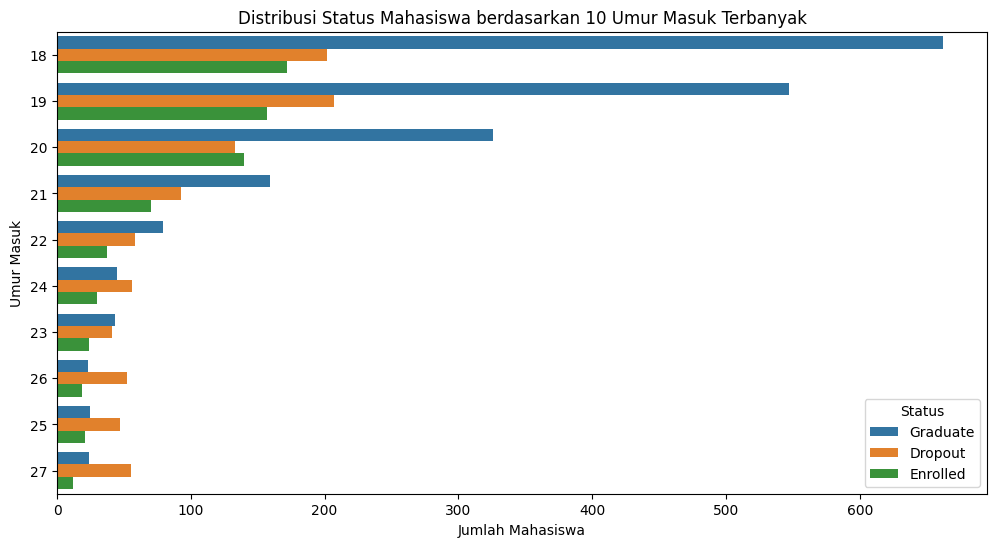

In [169]:
# Distribusi berdasar umur
top_ages = df['Age_at_enrollment'].value_counts().nlargest(10).index

filtered_df = df[df['Age_at_enrollment'].isin(top_ages)]

plt.figure(figsize=(12, 6))
sns.countplot(y='Age_at_enrollment', hue='Status', data=filtered_df, order=top_ages)
plt.title('Distribusi Status Mahasiswa berdasarkan 10 Umur Masuk Terbanyak')
plt.xlabel('Jumlah Mahasiswa')
plt.ylabel('Umur Masuk')
plt.show()


4. Membandingkan fitur penting terhadap Status
Tujuan: Apakah Admission_grade, Tuition_fees_up_to_date, dan Curricular_units_1st_sem_grade

<Axes: xlabel='Status', ylabel='Admission_grade'>

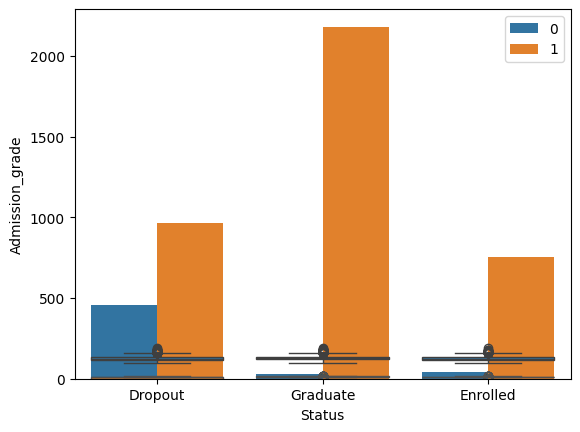

In [170]:
sns.boxplot(x='Status', y='Admission_grade', data=df)
sns.countplot(x='Status', hue='Tuition_fees_up_to_date', data=df)
sns.boxplot(x='Status', y='Curricular_units_1st_sem_grade', data=df)


5. Analisis Faktor Ekonomi Makro Unemplyement rate

<Axes: xlabel='Status', ylabel='Unemployment_rate'>

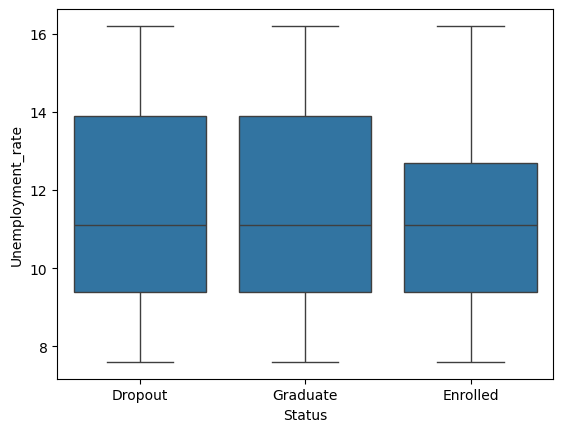

In [171]:
sns.boxplot(x='Status', y='Unemployment_rate', data=df)


**Insights:**
- Deskripsi Fitur Numerik:
Nilai-nilai pada fitur numerik terlihat wajar dan tidak menunjukkan adanya outlier ekstrem atau nilai yang mencurigakan.

- Distribusi Status Mahasiswa:
Mayoritas mahasiswa memiliki status Graduate, disusul oleh Dropout dan Enrolled. Ini menunjukkan bahwa sebagian besar mahasiswa berhasil menyelesaikan studinya, tetapi angka dropout tetap signifikan.

- Grafik mahasiswa yang paling banyak drop out berdasarkan umur masuk kuliah pada 19 tahun


- Fitur yang Mempengaruhi Dropout:
Beberapa fitur memiliki korelasi visual yang cukup kuat terhadap status mahasiswa, di antaranya:

- Admission Grade: Mahasiswa dengan nilai awal yang rendah cenderung memiliki risiko dropout lebih tinggi.

- Tuition Fees Up to Date: Mahasiswa yang memiliki tunggakan pembayaran lebih banyak ditemukan pada kelompok dropout.

- Curricular Units 1st Grade Approved: Jumlah mata kuliah yang lulus pada tahun pertama berbanding lurus dengan keberhasilan menyelesaikan studi.

- Faktor Eksternal (Ekonomi):
Employment Rate (tingkat pekerjaan di negara) tampak berkaitan dengan angka dropout. Saat tingkat pengangguran tinggi, kemungkinan dropout cenderung meningkat—mungkin karena tekanan finansial atau gangguan eksternal lainnya.

## Data Preparation / Preprocessing
Melakukan data preparation dan preprocessing untuk membersihkan data sebelum modelling

1. Mengecek Missing Value

In [172]:
df

,Marital_status,Application_mode,Application_order,Course,Daytime_evening_attendance,Previous_qualification,Previous_qualification_grade,Nacionality,Mothers_qualification,Fathers_qualification,...,Curricular_units_2nd_sem_credited,Curricular_units_2nd_sem_enrolled,Curricular_units_2nd_sem_evaluations,Curricular_units_2nd_sem_approved,Curricular_units_2nd_sem_grade,Curricular_units_2nd_sem_without_evaluations,Unemployment_rate,Inflation_rate,GDP,Status
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4419,1,1,6,9773,1,1,125.0,1,1,1,...,0,6,8,5,12.666667,0,15.5,2.8,-4.06,Graduate
4420,1,1,2,9773,1,1,120.0,105,1,1,...,0,6,6,2,11.000000,0,11.1,0.6,2.02,Dropout
4421,1,1,1,9500,1,1,154.0,1,37,37,...,0,8,9,1,13.500000,0,13.9,-0.3,0.79,Dropout
4422,1,1,1,9147,1,1,180.0,1,37,37,...,0,5,6,5,12.000000,0,9.4,-0.8,-3.12,Graduate


In [173]:
df.isnull().sum().sort_values(ascending=False)


,0
Marital_status,0
Application_mode,0
Application_order,0
Course,0
Daytime_evening_attendance,0
Previous_qualification,0
Previous_qualification_grade,0
Nacionality,0
Mothers_qualification,0
Fathers_qualification,0


2. Menangani outlier

In [174]:
num_cols = [
    'Tuition_fees_up_to_date',
    'Age_at_enrollment',
    'Previous_qualification_grade',
    'Curricular_units_1st_sem_enrolled',
    'Curricular_units_1st_sem_evaluations',
    'Curricular_units_1st_sem_credited',
    'Curricular_units_1st_sem_approved',
    'Curricular_units_1st_sem_grade',
    'Curricular_units_1st_sem_without_evaluations',
    'Curricular_units_2nd_sem_credited',
    'Curricular_units_2nd_sem_enrolled',
    'Curricular_units_2nd_sem_evaluations',
    'Curricular_units_2nd_sem_approved',
    'Curricular_units_2nd_sem_grade',
    'Curricular_units_2nd_sem_without_evaluations',
    'Unemployment_rate',
    'Inflation_rate',
    'GDP'
]

Q1 = df[num_cols].quantile(0.25)
Q3 = df[num_cols].quantile(0.75)
IQR = Q3 - Q1

outliers_iqr = ((df[num_cols] < (Q1 - 1.5 * IQR)) | (df[num_cols] > (Q3 + 1.5 * IQR)))
print(outliers_iqr.sum())


Tuition_fees_up_to_date                         528
Age_at_enrollment                               441
Previous_qualification_grade                    179
Curricular_units_1st_sem_enrolled               424
Curricular_units_1st_sem_evaluations            158
Curricular_units_1st_sem_credited               577
Curricular_units_1st_sem_approved               180
Curricular_units_1st_sem_grade                  726
Curricular_units_1st_sem_without_evaluations    294
Curricular_units_2nd_sem_credited               530
Curricular_units_2nd_sem_enrolled               369
Curricular_units_2nd_sem_evaluations            109
Curricular_units_2nd_sem_approved                44
Curricular_units_2nd_sem_grade                  877
Curricular_units_2nd_sem_without_evaluations    282
Unemployment_rate                                 0
Inflation_rate                                    0
GDP                                               0
dtype: int64


3. Encode kolom target Status

In [175]:
original_df = df.copy()
status_map = {'Graduate': 1, 'Dropout': 2, 'Enrolled': 0}
df['Status'] = df['Status'].map(status_map)
df['Status']

,Status
0,2
1,1
2,2
3,1
4,1
...,...
4419,1
4420,2
4421,2
4422,1


4. Memisahkan fitur dan target

In [176]:
X = df.drop('Status', axis=1)
y = df['Status']


In [177]:
X

,Marital_status,Application_mode,Application_order,Course,Daytime_evening_attendance,Previous_qualification,Previous_qualification_grade,Nacionality,Mothers_qualification,Fathers_qualification,...,Curricular_units_1st_sem_without_evaluations,Curricular_units_2nd_sem_credited,Curricular_units_2nd_sem_enrolled,Curricular_units_2nd_sem_evaluations,Curricular_units_2nd_sem_approved,Curricular_units_2nd_sem_grade,Curricular_units_2nd_sem_without_evaluations,Unemployment_rate,Inflation_rate,GDP
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0,0.000000,0,10.8,1.4,1.74
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,0,6,6,6,13.666667,0,13.9,-0.3,0.79
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,0,6,0,0,0.000000,0,10.8,1.4,1.74
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,0,6,10,5,12.400000,0,9.4,-0.8,-3.12
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,0,6,6,6,13.000000,0,13.9,-0.3,0.79
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4419,1,1,6,9773,1,1,125.0,1,1,1,...,0,0,6,8,5,12.666667,0,15.5,2.8,-4.06
4420,1,1,2,9773,1,1,120.0,105,1,1,...,0,0,6,6,2,11.000000,0,11.1,0.6,2.02
4421,1,1,1,9500,1,1,154.0,1,37,37,...,0,0,8,9,1,13.500000,0,13.9,-0.3,0.79
4422,1,1,1,9147,1,1,180.0,1,37,37,...,0,0,5,6,5,12.000000,0,9.4,-0.8,-3.12


In [178]:
y

,Status
0,2
1,1
2,2
3,1
4,1
...,...
4419,1
4420,2
4421,2
4422,1


5. Memisahkan Train-Test Split

In [179]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)
print(X_train.shape)
print(X_test.shape)

(3539, 36)
(885, 36)


6. Melakukan Feature selection

In [180]:
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

top_features = pd.DataFrame({
                             'Feature': X_train.columns,
                             'Importance': rf.feature_importances_
}).sort_values(by='Importance', ascending=False)
top_features

,Feature,Importance
30,Curricular_units_2nd_sem_approved,0.134512
31,Curricular_units_2nd_sem_grade,0.107902
24,Curricular_units_1st_sem_approved,0.092271
25,Curricular_units_1st_sem_grade,0.060888
12,Admission_grade,0.044305
29,Curricular_units_2nd_sem_evaluations,0.039775
16,Tuition_fees_up_to_date,0.039745
19,Age_at_enrollment,0.039596
6,Previous_qualification_grade,0.038243
23,Curricular_units_1st_sem_evaluations,0.036610


In [181]:
selected_features = top_features[top_features['Importance'] > 0.035]['Feature'].tolist()
print(f"Selected {len(selected_features)} features:", selected_features)

Selected 10 features: ['Curricular_units_2nd_sem_approved', 'Curricular_units_2nd_sem_grade', 'Curricular_units_1st_sem_approved', 'Curricular_units_1st_sem_grade', 'Admission_grade', 'Curricular_units_2nd_sem_evaluations', 'Tuition_fees_up_to_date', 'Age_at_enrollment', 'Previous_qualification_grade', 'Curricular_units_1st_sem_evaluations']


In [182]:
X_train_selected = X_train[selected_features]
X_test_selected = X_test[selected_features]


In [183]:
X_train_selected.head()

,Curricular_units_2nd_sem_approved,Curricular_units_2nd_sem_grade,Curricular_units_1st_sem_approved,Curricular_units_1st_sem_grade,Admission_grade,Curricular_units_2nd_sem_evaluations,Tuition_fees_up_to_date,Age_at_enrollment,Previous_qualification_grade,Curricular_units_1st_sem_evaluations
1008,7,14.428571,7,14.428571,142.3,8,1,18,165.0,8
508,5,14.000000,4,13.000000,146.2,6,1,18,150.0,12
1491,6,11.000000,6,11.500000,116.0,8,1,20,133.1,8
2013,0,0.000000,0,0.000000,95.5,10,0,32,110.0,6
3877,8,14.200000,8,14.200000,126.8,8,1,20,141.0,8


In [184]:
X_test_selected.head()

,Curricular_units_2nd_sem_approved,Curricular_units_2nd_sem_grade,Curricular_units_1st_sem_approved,Curricular_units_1st_sem_grade,Admission_grade,Curricular_units_2nd_sem_evaluations,Tuition_fees_up_to_date,Age_at_enrollment,Previous_qualification_grade,Curricular_units_1st_sem_evaluations
1904,6,11.666667,6,12.833333,117.9,7,1,19,121.0,7
627,8,13.811111,7,13.025000,109.5,9,1,19,106.0,8
2076,6,12.333333,6,11.666667,129.0,6,1,19,123.0,8
1899,8,14.000000,10,14.500000,153.8,15,1,21,150.0,15
1272,4,12.000000,2,10.000000,132.1,6,1,34,151.0,7


In [185]:
y_train.head()

,Status
1008,1
508,2
1491,1
2013,2
3877,1


In [186]:
y_test.head()

,Status
1904,1
627,1
2076,1
1899,1
1272,2


In [187]:
print("Shape of X_train_selected: ", X_train_selected.shape)
print("Shape of X_test_selected: ", X_test_selected.shape)
print("Shape of y_train: ", y_train.shape)
print("Shape of y_test: ", y_test.shape)

Shape of X_train_selected:  (3539, 10)
Shape of X_test_selected:  (885, 10)
Shape of y_train:  (3539,)
Shape of y_test:  (885,)


7. Melakukan Feature Scaling

In [188]:
X_train = X_train.reset_index(drop=True)
X_test = X_test.reset_index(drop=True)

features_to_scale = [
    'Curricular_units_2nd_sem_approved',
    'Curricular_units_2nd_sem_grade',
    'Curricular_units_1st_sem_approved',
    'Curricular_units_1st_sem_grade',
    'Admission_grade',
    'Curricular_units_2nd_sem_evaluations',
    'Age_at_enrollment',
    'Previous_qualification_grade',
    'Curricular_units_1st_sem_evaluations'
]

features_not_scaled = [
    'Tuition_fees_up_to_date'
]

X_train_to_scale = X_train[features_to_scale]
X_test_to_scale = X_test[features_to_scale]

X_train_not_scaled = X_train[features_not_scaled]
X_test_not_scaled = X_test[features_not_scaled]

# Scaling hanya fitur numerik
scaler = StandardScaler()
X_train_scaled_part = scaler.fit_transform(X_train_to_scale)
X_test_scaled_part = scaler.transform(X_test_to_scale)

# Konversi hasil scaling ke DataFrame lagi
X_train_scaled_df = pd.DataFrame(X_train_scaled_part, columns=features_to_scale)
X_test_scaled_df = pd.DataFrame(X_test_scaled_part, columns=features_to_scale)

# Gabungkan kembali dengan fitur kategori
X_train_scaled = pd.concat([X_train_scaled_df, X_train_not_scaled], axis=1)
X_test_scaled = pd.concat([X_test_scaled_df, X_test_not_scaled], axis=1)

# Urutkan kolom sesuai urutan semula:
X_train_scaled = X_train_scaled[X_train_to_scale.columns.tolist() + X_train_not_scaled.columns.tolist()]
X_test_scaled = X_test_scaled[X_test_to_scale.columns.tolist() + X_test_not_scaled.columns.tolist()]


In [189]:
print(X_train_scaled.shape)
print(X_test_scaled.shape)

print(X_train_scaled.isna().sum())
print(X_test_scaled.isna().sum())

(3539, 10)
(885, 10)
Curricular_units_2nd_sem_approved       0
Curricular_units_2nd_sem_grade          0
Curricular_units_1st_sem_approved       0
Curricular_units_1st_sem_grade          0
Admission_grade                         0
Curricular_units_2nd_sem_evaluations    0
Age_at_enrollment                       0
Previous_qualification_grade            0
Curricular_units_1st_sem_evaluations    0
Tuition_fees_up_to_date                 0
dtype: int64
Curricular_units_2nd_sem_approved       0
Curricular_units_2nd_sem_grade          0
Curricular_units_1st_sem_approved       0
Curricular_units_1st_sem_grade          0
Admission_grade                         0
Curricular_units_2nd_sem_evaluations    0
Age_at_enrollment                       0
Previous_qualification_grade            0
Curricular_units_1st_sem_evaluations    0
Tuition_fees_up_to_date                 0
dtype: int64


In [190]:
X_train_scaled

,Curricular_units_2nd_sem_approved,Curricular_units_2nd_sem_grade,Curricular_units_1st_sem_approved,Curricular_units_1st_sem_grade,Admission_grade,Curricular_units_2nd_sem_evaluations,Age_at_enrollment,Previous_qualification_grade,Curricular_units_1st_sem_evaluations,Tuition_fees_up_to_date
0,0.863105,0.804485,0.758779,0.783304,1.074294,-0.002036,-0.692973,2.455569,-0.067297,1
1,0.189931,0.722093,-0.227866,0.487890,1.345931,-0.516582,-0.692973,1.317724,0.893040,1
2,0.526518,0.145350,0.429897,0.177704,-0.757516,-0.002036,-0.423697,0.035750,-0.067297,1
3,-1.493006,-1.969374,-1.543392,-2.200384,-2.185353,0.512510,1.191959,-1.716532,-0.547465,0
4,1.199693,0.760543,1.087660,0.736038,-0.005290,-0.002036,-0.423697,0.635016,-0.067297,1
...,...,...,...,...,...,...,...,...,...,...
3534,-1.493006,-1.969374,-1.543392,-2.200384,-1.189350,-1.545674,-0.019783,-0.199404,-1.267717,0
3535,-0.146657,0.145350,-0.227866,0.074309,-0.855027,-0.773855,-0.692973,-0.730399,-0.787549,1
3536,0.863105,0.376048,0.758779,0.322457,-0.109766,-0.259309,-0.558335,0.331590,-0.307381,1
3537,-0.146657,0.385660,0.758779,0.133392,-0.478914,1.798875,-0.289059,-0.957968,1.373208,1


In [191]:
X_test_scaled

,Curricular_units_2nd_sem_approved,Curricular_units_2nd_sem_grade,Curricular_units_1st_sem_approved,Curricular_units_1st_sem_grade,Admission_grade,Curricular_units_2nd_sem_evaluations,Age_at_enrollment,Previous_qualification_grade,Curricular_units_1st_sem_evaluations,Tuition_fees_up_to_date
0,0.526518,0.273515,0.429897,0.453424,-0.625180,-0.259309,-0.558335,-0.882112,-0.307381,1
1,1.199693,0.685780,0.758779,0.493059,-1.210245,0.255237,-0.558335,-2.019958,-0.067297,1
2,0.526518,0.401681,0.429897,0.212169,0.147941,-0.516582,-0.558335,-0.730399,-0.067297,1
3,1.199693,0.722093,1.745423,0.798075,1.875275,1.798875,-0.289059,1.317724,1.613292,1
4,-0.146657,0.337598,-0.885629,-0.132481,0.363858,-0.516582,1.461234,1.393580,-0.307381,1
...,...,...,...,...,...,...,...,...,...,...
880,-1.493006,-1.969374,-1.543392,-2.200384,-0.478914,-0.516582,-0.154421,-0.957968,-1.987970,0
881,2.546042,0.385660,5.363119,0.356296,-0.478914,3.342514,0.249493,-0.957968,4.254217,0
882,0.863105,0.419990,1.416541,0.418959,0.217592,-0.259309,0.922683,-0.624200,0.652955,1
883,0.189931,0.978424,0.101016,0.446531,0.544949,-0.516582,1.326596,2.834851,-0.787549,1


**Insights:**
- Tidak ada missing value pada data
- Outlier pada fitur numerik tidak ditangani atau dibiarkan saja, karena data tersebut masih penting

- Encoding Data Kategorikal
Kolom Status yang sebelumnya bertipe object telah diubah menjadi tipe numerik agar dapat digunakan dalam model machine learning.

- Target Variable
Kolom Status dipilih sebagai target untuk prediksi dropout.

- Train-Test Split
Dataset dibagi menjadi data pelatihan dan data pengujian untuk menghindari data leakage dan memastikan generalisasi model.

- Feature Selection
Seleksi fitur dilakukan menggunakan Random Forest.
Jumlah fitur awal: 36
Jumlah fitur terpilih: 10
Fitur yang dipilih: ['Curricular_units_2nd_sem_approved', 'Curricular_units_2nd_sem_grade', 'Curricular_units_1st_sem_approved', 'Curricular_units_1st_sem_grade', 'Admission_grade', 'Curricular_units_2nd_sem_evaluations', 'Tuition_fees_up_to_date', 'Age_at_enrollment', 'Previous_qualification_grade', 'Curricular_units_1st_sem_evaluations']

- Proses scaling pada fitur numerik dilakukan menggunakan StandardScaler untuk menstandarisasi data dan meningkatkan performa model.

## Modeling

In [192]:
# Buat model RF dasar
rf = RandomForestClassifier(random_state=42)

**Insights:**

Modelling random forest lebih robust terhadap outlier

## Evaluation

In [193]:
# Parameter
param_dist = {
    'n_estimators': [100, 200, 300, 400, 500],
    'max_depth': [None, 5, 10, 15, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2']
}

# RandomizedSearchCV dengan 5 fold cross-validation
random_search = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_dist,
    n_iter=20,
    scoring='accuracy',
    cv=5,
    verbose=2,
    random_state=42,
    n_jobs=-1
)

# Fit ke data training
random_search.fit(X_train_scaled, y_train)

# Best estimator dan parameter
print("Best parameters:", random_search.best_params_)

# Prediksi dan evaluasi
best_rf = random_search.best_estimator_
y_pred = best_rf.predict(X_test_scaled)
print(f"Random Forest Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print(classification_report(y_test, y_pred))


Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best parameters: {'n_estimators': 100, 'min_samples_split': 2, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'max_depth': None}
Random Forest Accuracy: 0.7684
              precision    recall  f1-score   support

           0       0.52      0.33      0.40       159
           1       0.79      0.93      0.85       442
           2       0.82      0.77      0.79       284

    accuracy                           0.77       885
   macro avg       0.71      0.67      0.68       885
weighted avg       0.75      0.77      0.75       885



**Insights:**

- Memakai hyperparameter tunning untuk meningkatkan akurasi
- Di dapatkan akurasi 0.77



## Simpan Model

In [194]:
import joblib
joblib.dump(best_rf, 'model_rf.pkl')
joblib.dump(scaler, 'scaler.pkl')
joblib.dump(selected_features, 'selected_features.pkl')


['selected_features.pkl']

In [195]:
selected_features

['Curricular_units_2nd_sem_approved',
 'Curricular_units_2nd_sem_grade',
 'Curricular_units_1st_sem_approved',
 'Curricular_units_1st_sem_grade',
 'Admission_grade',
 'Curricular_units_2nd_sem_evaluations',
 'Tuition_fees_up_to_date',
 'Age_at_enrollment',
 'Previous_qualification_grade',
 'Curricular_units_1st_sem_evaluations']

## Inference

1. Contoh inference graduate

In [196]:
model = joblib.load('model_rf.pkl')
scaler = joblib.load('scaler.pkl')

selected_features = list(model.feature_names_in_)

features_to_scale = [
    'Curricular_units_2nd_sem_approved',
    'Curricular_units_2nd_sem_grade',
    'Curricular_units_1st_sem_approved',
    'Curricular_units_1st_sem_grade',
    'Admission_grade',
    'Curricular_units_2nd_sem_evaluations',
    'Age_at_enrollment',
    'Previous_qualification_grade',
    'Curricular_units_1st_sem_evaluations'
]
features_not_scaled = ['Tuition_fees_up_to_date']

sample_input = pd.DataFrame([{
    'Curricular_units_2nd_sem_approved': 5,
    'Curricular_units_2nd_sem_grade': 13.2,
    'Curricular_units_1st_sem_approved': 6,
    'Curricular_units_1st_sem_grade': 14.8,
    'Admission_grade': 165.0,
    'Curricular_units_2nd_sem_evaluations': 7,
    'Tuition_fees_up_to_date': 1,  # 1 = Ya, 0 = Tidak
    'Age_at_enrollment': 18,
    'Previous_qualification_grade': 150.0,
    'Curricular_units_1st_sem_evaluations': 8
}])

for col in selected_features:
  if col not in sample_input.columns:
    sample_input[col] = 0

features_to_scale_filtered = [f for f in selected_features if f in features_to_scale]
features_not_scaled_filtered = [f for f in selected_features if f in features_not_scaled]

X_to_scale = sample_input[features_to_scale_filtered]
X_not_scaled = sample_input[features_not_scaled_filtered]

X_scaled_part = scaler.transform(X_to_scale)
X_scaled_df = pd.DataFrame(X_scaled_part, columns=features_to_scale_filtered)

sample_final = pd.concat([X_scaled_df, X_not_scaled], axis=1)

sample_final = sample_final[selected_features]

pred = model.predict(sample_final)[0]
probs = model.predict_proba(sample_final)[0]

status_map_reverse = {0: "Enrolled", 1: "Graduate", 2: "Dropout"}

print("Predicted Status Mahasiswa:", status_map_reverse[pred])
for i, prob in enumerate(probs):
    print(f"Probability of {status_map_reverse[i]}: {prob:.4f}")

Predicted Status Mahasiswa: Graduate
Probability of Enrolled: 0.0740
Probability of Graduate: 0.6961
Probability of Dropout: 0.2299


2. Contoh inference drop out

In [197]:
import pandas as pd
import joblib

model = joblib.load('model_rf.pkl')
scaler = joblib.load('scaler.pkl')

selected_features = list(model.feature_names_in_)

features_to_scale = [
    'Curricular_units_2nd_sem_approved',
    'Curricular_units_2nd_sem_grade',
    'Curricular_units_1st_sem_approved',
    'Curricular_units_1st_sem_grade',
    'Admission_grade',
    'Curricular_units_2nd_sem_evaluations',
    'Age_at_enrollment',
    'Previous_qualification_grade',
    'Curricular_units_1st_sem_evaluations'
]
features_not_scaled = ['Tuition_fees_up_to_date']

sample_input = pd.DataFrame([{
    'Curricular_units_2nd_sem_approved': 0,
    'Curricular_units_2nd_sem_grade': 9,
    'Curricular_units_1st_sem_approved': 10,
    'Curricular_units_1st_sem_grade': 10,
    'Admission_grade': 135.0,
    'Curricular_units_2nd_sem_evaluations': 7,
    'Tuition_fees_up_to_date': 0,  # 1 = Ya, 0 = Tidak
    'Age_at_enrollment': 22,
    'Previous_qualification_grade': 70.0,
    'Curricular_units_1st_sem_evaluations': 5
}])

for col in selected_features:
  if col not in sample_input.columns:
    sample_input[col] = 0

features_to_scale_filtered = [f for f in selected_features if f in features_to_scale]
features_not_scaled_filtered = [f for f in selected_features if f in features_not_scaled]

X_to_scale = sample_input[features_to_scale_filtered]
X_not_scaled = sample_input[features_not_scaled_filtered]

X_scaled_part = scaler.transform(X_to_scale)
X_scaled_df = pd.DataFrame(X_scaled_part, columns=features_to_scale_filtered)

sample_final = pd.concat([X_scaled_df, X_not_scaled], axis=1)

sample_final = sample_final[selected_features]

pred = model.predict(sample_final)[0]
probs = model.predict_proba(sample_final)[0]

status_map_reverse = {0: "Enrolled", 1: "Graduate", 2: "Dropout"}

print("Predicted Status Mahasiswa:", status_map_reverse[pred])
for i, prob in enumerate(probs):
    print(f"Probability of {status_map_reverse[i]}: {prob:.4f}")

Predicted Status Mahasiswa: Dropout
Probability of Enrolled: 0.1916
Probability of Graduate: 0.0616
Probability of Dropout: 0.7468


Mapping untuk dashboard

In [198]:
# Salin dari original_df sebelum scaling
df_dashboard = original_df[selected_features + ['Status']].copy()

# Mapping Tuition Fees
df_dashboard['Tuition_fees_up_to_date'] = df_dashboard['Tuition_fees_up_to_date'].map({0: 'No', 1: 'Yes'})


print(df_dashboard['Status'].unique())


['Dropout' 'Graduate' 'Enrolled']


In [199]:
df_dashboard.head()

,Curricular_units_2nd_sem_approved,Curricular_units_2nd_sem_grade,Curricular_units_1st_sem_approved,Curricular_units_1st_sem_grade,Admission_grade,Curricular_units_2nd_sem_evaluations,Age_at_enrollment,Previous_qualification_grade,Curricular_units_1st_sem_evaluations,Tuition_fees_up_to_date,Status
0,0,0.000000,0,0.000000,127.3,0,20,122.0,0,Yes,Dropout
1,6,13.666667,6,14.000000,142.5,6,19,160.0,6,No,Graduate
2,0,0.000000,0,0.000000,124.8,0,19,122.0,0,No,Dropout
3,5,12.400000,6,13.428571,119.6,10,20,122.0,8,Yes,Graduate
4,6,13.000000,5,12.333333,141.5,6,45,100.0,9,Yes,Graduate


In [200]:
# Simpan ke file
df_dashboard.to_csv('dashboard_data.csv', index=False)

files.download("dashboard_data.csv")

print("sudah tersimpan")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

sudah tersimpan
